In [4]:
import numpy as np
from scipy import signal
import scipy.io.wavfile
import matplotlib.pyplot as plt
import math
from IPython.display import Audio

In [5]:
sourceFilesPrefix="ExpectedResults//speech-"

rate1, sample1_data = scipy.io.wavfile.read(sourceFilesPrefix+"1.wav")
rate2, sample2_data=scipy.io.wavfile.read(sourceFilesPrefix+"2.wav")

In [6]:
def sigmoid(y):
    #g=np.zeros(y.shape)
    g=np.divide(1,np.add(1,np.exp(-y)))
    #print(g)
    return g

def gradient(eta, Y, W):
    Z=sigmoid(Y)
    Id=np.identity(Y.shape[0])
    grad=eta*(Id+np.dot((1-2*Z),Y.T))*W
    # la cost se adauga 1/norma de W, 
    # se schimba gradientul pentru noua expresie
    return grad

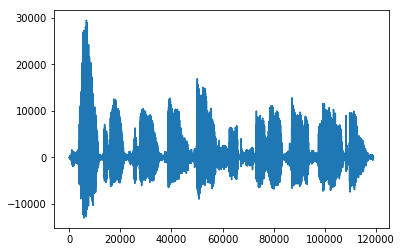

In [7]:
plt.figure()
plt.plot(sample1_data)
plt.show()
Audio(data=sample1_data, rate=16000)

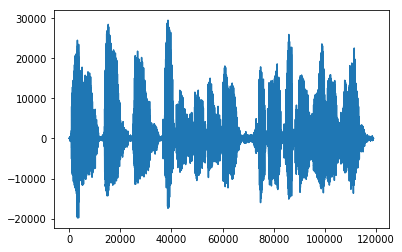

In [8]:
plt.figure()
plt.plot(sample2_data)
plt.show()
Audio(data=sample2_data, rate=16000)

In [9]:
med1=sample1_data.std(axis=0)
s1data= sample1_data/med1
med2=sample2_data.std(axis=0)
s2data=sample2_data/med2
orig=np.matrix([s1data,s2data])

n=len(orig)
#A=np.random.random([n,n])
A=np.matrix([[0.15270211,0.8406566],
             [0.90514896,0.53725471]])
print("Mixing matrix: \n"+str(A))

X=np.dot(A,orig)


Mixing matrix: 
[[ 0.15270211  0.8406566 ]
 [ 0.90514896  0.53725471]]


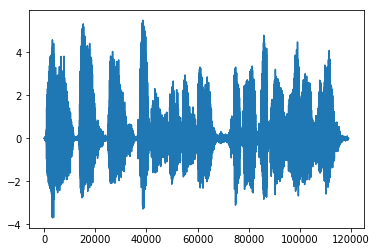

In [10]:
plt.figure()
plt.plot(X[0].T)
plt.show()

In [11]:
Audio(data=X[0], rate=16000)

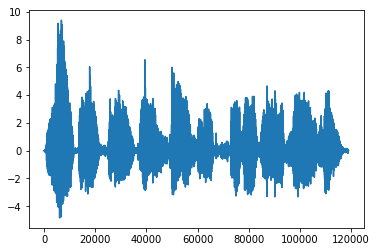

In [12]:
plt.figure()
plt.plot(X[1].T)
plt.show()

In [13]:
Audio(data=X[1], rate=16000)

In [14]:
corr=1
while abs(corr)>=1e-6:
    eta=0.01
    eta0=eta
    T=1000
    num_iter=5000

    W=np.random.random([n,n])/100
    print("Initial guessed decomposition matrix: \n"+str(W))
    for i in range(0,num_iter):
        Y=np.dot(W,X)
        delW=gradient(eta,Y,W)
        aux=W+delW
        W=aux
        eta=eta0/(1+(i/T))
    Y2=np.dot(W,X)
    corr=np.correlate(np.ravel(Y2[0]),np.ravel(Y2[1]))
    print(corr)

Initial guessed decomposition matrix: 
[[ 0.00909721  0.00954186]
 [ 0.00654919  0.00684574]]
[ -1.94333309e-06]
Initial guessed decomposition matrix: 
[[ 0.00796821  0.0097459 ]
 [ 0.00448648  0.00335285]]
[ -2.74918545e-06]
Initial guessed decomposition matrix: 
[[ 0.00217993  0.00554894]
 [ 0.00908395  0.00585558]]
[  3.92038269e-07]


[[-0.00383851  0.00514624]
 [ 0.0050525  -0.00032287]]


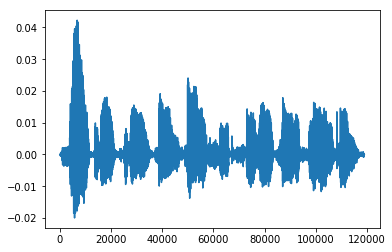

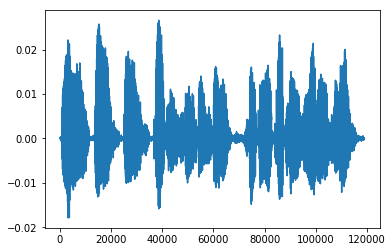

In [15]:
print(W)
Y2=np.dot(W,X)
plt.figure()
plt.plot(Y2[0].T)
plt.show()
plt.figure()
plt.plot(Y2[1].T)
plt.show()

In [16]:
Audio(data=Y2[0], rate=16000)

In [18]:
Audio(data=Y2[1], rate=16000)

In [ ]:
# minimizare sau maximiare ?
# minimizare norma de W, dot(W.T, W)